In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import io
import geopandas as gpd
import seaborn as sns

# suppress warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# get them back from the cloud
# the reduced version should only have 10 columns
saved_2017 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2017_reduced.csv"
saved_2018 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2018_reduced.csv"
saved_2019 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2019_reduced.csv"
saved_2020 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2020_reduced.csv"
saved_2021 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2021_reduced.csv"
saved_2022 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2022_reduced.csv"
saved_2023 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2023_reduced.csv"
saved_2024 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2024_reduced.csv"

In [4]:
df_2017 = pd.read_csv(saved_2017)
df_2018 = pd.read_csv(saved_2018)
df_2019 = pd.read_csv(saved_2019)
df_2020 = pd.read_csv(saved_2020)
df_2021 = pd.read_csv(saved_2021)
df_2022 = pd.read_csv(saved_2022)
df_2023 = pd.read_csv(saved_2023)
df_2024 = pd.read_csv(saved_2024)

In [5]:
df_2017.shape, df_2018.shape, df_2019.shape, df_2020.shape, df_2021.shape, df_2022.shape, df_2023.shape, df_2024.shape

((1032946, 10),
 (1066249, 10),
 (996996, 10),
 (1263463, 10),
 (1355688, 10),
 (1433295, 10),
 (1412135, 10),
 (1527906, 10))

In [178]:
covid_df = pd.concat([df_2020, df_2021, df_2022])
covid_df.shape

(4052446, 10)

In [179]:
duplicate_count = covid_df.duplicated('unique_key').sum()
duplicate_count # 0

np.int64(0)

In [180]:
covid_df = covid_df [covid_df['complaint_type'] != 'Noise - Commercial']
covid_df.shape

(3902356, 10)

In [181]:
f"removed {4052446 - 3902356} rows with 'Noise - Commercial' complaint type"

"removed 150090 rows with 'Noise - Commercial' complaint type"

In [182]:
covid_df.shape, covid_df.columns

((3902356, 10),
 Index(['unique_key', 'created_date', 'closed_date', 'complaint_type',
        'incident_zip', 'incident_address', 'bbl', 'borough', 'latitude',
        'longitude'],
       dtype='object'))

In [183]:
covid_df.bbl[0].dtype

dtype('float64')

In [184]:
covid_df.bbl = covid_df.bbl.astype('int64')

In [185]:
saved_bbl_evictions = "/content/drive/My Drive/X999/bbl_evictions_merged_covid.csv"

In [186]:
bbl_evictions = pd.read_csv(saved_bbl_evictions)

In [187]:
bbl_evictions.shape

(6338, 40)

In [188]:
bbl_evictions.columns

Index(['court_index_number', 'docket_number', 'eviction_address',
       'eviction_apartment_number', 'executed_date', 'borough',
       'eviction_postcode', 'ejectment', 'eviction/legal_possession',
       'latitude', 'longitude', 'community_board', 'council_district',
       'census_tract', 'bin', 'bbl', 'nta', 'geometry', 'eviction_count',
       'year', 'average_year_eviction_count', 'bbl_clean', 'yearbuilt',
       'bldgclass', 'numfloors', 'unitsres', 'ownername', 'bldgarea',
       'building_type', 'building_category', 'is_condo', 'floor_category',
       'rent_era', 'architectural_style', 'economic_period',
       'residential_units_category', 'is_llc', 'building_size_category',
       'size_quartile', 'decade'],
      dtype='object')

In [189]:
bbl_evictions.bbl_clean[0].dtype, covid_df.bbl[0].dtype, covid_df.bbl[0]

(dtype('int64'),
 dtype('int64'),
 0    2029820027
 0    2027030018
 0    1021650063
 Name: bbl, dtype: int64)

In [190]:
covid_df.bbl = covid_df.bbl.astype('int64')

In [191]:
covid_df.bbl[0].dtype

dtype('int64')

In [192]:
covid_df.bbl, bbl_evictions.bbl_clean

(0          2029820027
 1          1015290018
 2          2031990003
 3          1004530034
 4          1022217501
               ...    
 1433290    3082240022
 1433291    1018240016
 1433292    2024550014
 1433293    1018810032
 1433294    3068667501
 Name: bbl, Length: 3902356, dtype: int64,
 0       2028200035
 1       1016447502
 2       4031500075
 3       2037760056
 4       4007200032
            ...    
 6333    3074220101
 6334    3050990021
 6335    3072800188
 6336    3088150042
 6337    3051680049
 Name: bbl_clean, Length: 6338, dtype: int64)

In [193]:
# pandas.Series.isin() returns a boolean mask of values in the first series that also appear in the second
overlap_mask = bbl_evictions.bbl_clean.isin(covid_df.bbl)
overlapping_values = bbl_evictions.bbl_clean[overlap_mask]
num_overlaps = overlap_mask.sum()
num_overlaps
# pretty good, given the bbl_evictions_df.shape is (74082, 40)
(4347 / 6338) # 68.586% of residential buildings that had evictions also had 311 complaints

0.6858630482802146

In [194]:
covid_df.head()

,unique_key,created_date,closed_date,complaint_type,incident_zip,incident_address,bbl,borough,latitude,longitude
0,48538697,2020-12-31 23:59:55,2021-01-01 01:07:04,Noise - Vehicle,10460.0,1569 HOE AVENUE,2029820027,BRONX,40.835820,-73.887516
1,48536596,2020-12-31 23:59:28,2021-01-01 01:33:12,Noise - Residential,10028.0,235 EAST 83 STREET,1015290018,MANHATTAN,40.776503,-73.954525
2,48536500,2020-12-31 23:58:55,2021-01-01 00:24:54,Noise - Residential,10468.0,2380 GRAND AVENUE,2031990003,BRONX,40.861553,-73.904168
3,48542024,2020-12-31 23:58:45,2021-01-14 16:49:17,Noise - Helicopter,10003.0,195 1 AVENUE,1004530034,MANHATTAN,40.729916,-73.983616
4,48543542,2020-12-31 23:58:39,2021-01-01 00:13:47,Noise - Residential,10034.0,571 ACADEMY STREET,1022217501,MANHATTAN,40.863565,-73.923221


### 68.856% of the buildings that had evictions also had 311 complaints during Covid

In [196]:
# or use sets, but this only shows the unique overlapped bbl numbers
# (faster for large datasets)
set1 = set(bbl_evictions.bbl_clean)
set2 = set(covid_df.bbl)
unique_overlap = set1.intersection(set2)
len(unique_overlap)

4347

In [197]:
# numpy.intersect1d()
overlapping_values = np.intersect1d(bbl_evictions.bbl_clean, covid_df.bbl)
len(overlapping_values)

4347

In [198]:
bbl_evictions.head()

,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,eviction_postcode,ejectment,eviction/legal_possession,latitude,...,is_condo,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade
0,35484/19,494073,184 MT. EDEN PARKWAY,UNIT 1D,2020-01-02,BRONX,10457,Not an Ejectment,Possession,40.842943,...,False,mid-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","Pre-1929, pre-great depression",21-100 units,True,large,Q4 (largest 25%),1920-1929
1,251388/19,117473,160 EAST 117 STREET,3-B,2020-01-02,MANHATTAN,10035,Not an Ejectment,Possession,40.799094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66822/19,25733,66-07 ALDERTON ST,unknown,2020-01-02,QUEENS,11374,Not an Ejectment,Possession,40.719316,...,False,low-rise,"1994–Present, vacancy decontrol","1981–2000, Post-Modernism","1991–2008, modern economic growth",3-5 units,True,small,Q4 (largest 25%),1990-1999
3,68501/18,91505,1245 STRATFORD AVE,D12,2020-01-02,BRONX,10472,Not an Ejectment,Possession,40.830623,...,False,mid-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","Pre-1929, pre-great depression",21-100 units,True,very large,Q4 (largest 25%),1920-1929
4,68498/19,26147,28-16 47TH STREET,1-L,2020-01-02,QUEENS,11103,Not an Ejectment,Possession,40.762390,...,False,low-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","Pre-1929, pre-great depression",6-20 units,True,medium,Q4 (largest 25%),1920-1929


### Buildings that received most frequent complaints

In [199]:
complaint_counts_by_bbl = covid_df.groupby('bbl').size().reset_index(name='complaint_count')
complaint_counts_by_bbl = complaint_counts_by_bbl.sort_values('complaint_count', ascending=False)

In [200]:
complaint_counts_by_bbl.head(5)
# the top 2 are definitely outliers, most likely due to a technical error
# will exclude them when conducting further analysis.

,bbl,complaint_count
63790,2048330080,115559
63776,2048330028,60659
218857,4068290001,17739
63791,2048330083,16570
46073,2031430130,15513


In [201]:
f"that means, {115559/5/365} complaints per day for the top 1 building", \
f"that means, {60659/5/365} complaints per day for the second highest building",

('that means, 63.32 complaints per day for the top 1 building',
 'that means, 33.23780821917808 complaints per day for the second highest building')

In [202]:
bbl_data = covid_df[covid_df['bbl'] == 2048330080]
bbl_data['created_date'] = pd.to_datetime(bbl_data['created_date'])
complaints_by_date = bbl_data.groupby(bbl_data['created_date'].dt.date).size()
print(f"number of unique dates: {len(complaints_by_date)}")
print(f"average complaints per day: {complaints_by_date.mean():.2f}")
print(f"max amount of complaints in one day: {complaints_by_date.max()}")
print(f"date range: {min(complaints_by_date.index)} to {max(complaints_by_date.index)}")

print("Top 10 days with most complaints:")
# from mid september 2024 to late december 2024,
# this building has some serious issues and extrodianry amount of noise complaints
print("On the worst days, they had about 2700 noise complaints in one day")
print(complaints_by_date.sort_values(ascending=False).head(20))

# complaint types
complaint_type_counts = bbl_data['complaint_type'].value_counts()
print("Top 5 complaint types:")
print(complaint_type_counts.head())

number of unique dates: 247
average complaints per day: 467.85
max amount of complaints in one day: 2671
date range: 2020-05-02 to 2022-12-04
Top 10 days with most complaints:
On the worst days, they had about 2700 noise complaints in one day
created_date
2022-09-17    2671
2020-07-05    2655
2022-08-30    2433
2022-08-28    2371
2022-09-13    2286
2022-05-16    2262
2022-09-14    2246
2022-07-25    2240
2020-06-20    2227
2021-07-18    2227
2022-09-15    2193
2022-07-24    2192
2021-08-21    2160
2022-09-11    2133
2022-09-16    2127
2022-07-27    2017
2022-07-18    1961
2022-09-12    1934
2022-07-26    1924
2022-07-31    1890
dtype: int64
Top 5 complaint types:
complaint_type
Noise - Residential        115129
Noise - Vehicle               423
Rodent                          6
Noise - Street/Sidewalk         1
Name: count, dtype: int64


In [203]:
bbl_data = covid_df[covid_df['bbl'] == 2048330028]
bbl_data['created_date'] = pd.to_datetime(bbl_data['created_date'])
complaints_by_date = bbl_data.groupby(bbl_data['created_date'].dt.date).size()
print(f"number of unique dates: {len(complaints_by_date)}")
print(f"average complaints per day: {complaints_by_date.mean():.2f}")
print(f"max amount of complaints in one day: {complaints_by_date.max()}")
print(f"date range: {min(complaints_by_date.index)} to {max(complaints_by_date.index)}")

print("Top 10 days with most complaints:")
# from mid september 2024 to late december 2024,
# this building has some serious issues and extrodianry amount of noise complaints
print("On the worst days, they had about 2700 noise complaints in one day")
print(complaints_by_date.sort_values(ascending=False).head(20))

# complaint types
complaint_type_counts = bbl_data['complaint_type'].value_counts()
print("Top 5 complaint types:")
print(complaint_type_counts.head())

number of unique dates: 326
average complaints per day: 186.07
max amount of complaints in one day: 2714
date range: 2020-01-03 to 2022-12-24
Top 10 days with most complaints:
On the worst days, they had about 2700 noise complaints in one day
created_date
2022-02-12    2714
2022-02-13    1923
2022-02-14    1692
2022-02-11    1586
2020-08-09    1470
2020-08-08    1457
2020-08-10    1349
2021-01-19    1189
2022-02-10     939
2022-02-01     937
2020-09-14     889
2020-09-21     880
2020-09-03     872
2020-10-02     832
2020-08-02     806
2020-07-25     804
2020-08-24     804
2020-05-01     804
2020-09-13     722
2020-10-11     712
dtype: int64
Top 5 complaint types:
complaint_type
Noise - Residential     60554
HEAT/HOT WATER             23
UNSANITARY CONDITION       23
PAINT/PLASTER              16
PLUMBING                   15
Name: count, dtype: int64


### What are these two building? The first building was also the all time high during normal times, and was looked into in the previous notebook. Here, we will take a closer look at 2048330080.

In [30]:
saved_bbl = "/content/drive/My Drive/X999/bbl_cleaned.csv"

In [137]:
bbl_df = pd.read_csv(saved_bbl)

In [204]:
building_info = bbl_df[bbl_df['bbl'] == 2048330080]
building_info[['address', 'numfloors', 'unitsres', 'yearbuilt', 'building_size_category']]

,address,numfloors,unitsres,yearbuilt,building_size_category
59543,672 EAST 231 STREET,2.0,2.0,1920.0,medium-small


In [227]:
bbl_evictions[bbl_evictions['bbl'] == 2048330028].community_board, \
bbl_evictions[bbl_evictions['bbl'] == 2048330028].borough
# same area with the top building during normal times

(3283    12.0
 Name: community_board, dtype: float64,
 3283    BRONX
 Name: borough, dtype: object)

In [206]:
display(building_info)

,borough,block,lot,community board,census tract 2010,cb2010,schooldist,council district,postcode,firecomp,...,floor_category,building_age,decade,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile
59543,BX,4833,80,212.0,420.0,3000.0,11.0,12.0,10466.0,E063,...,low-rise,105.0,1920-1929,"Pre-1947, pre-rent-control","1900–1920, Beaux-Arts","Pre-1929, pre-great depression",2-unit,False,medium-small,Q4 (largest 25%)


It is a very large residential building in the Bronx. (top 25% in terms of size with 55 units)

In [207]:
complaint_counts_by_bbl.complaint_count.describe()
# overall the stats look right, but the top 1 building was definitely off, could be a technical error
# or something horrendous happened.

,complaint_count
count,279399.000000
mean,13.966965
std,260.954537
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,115559.000000


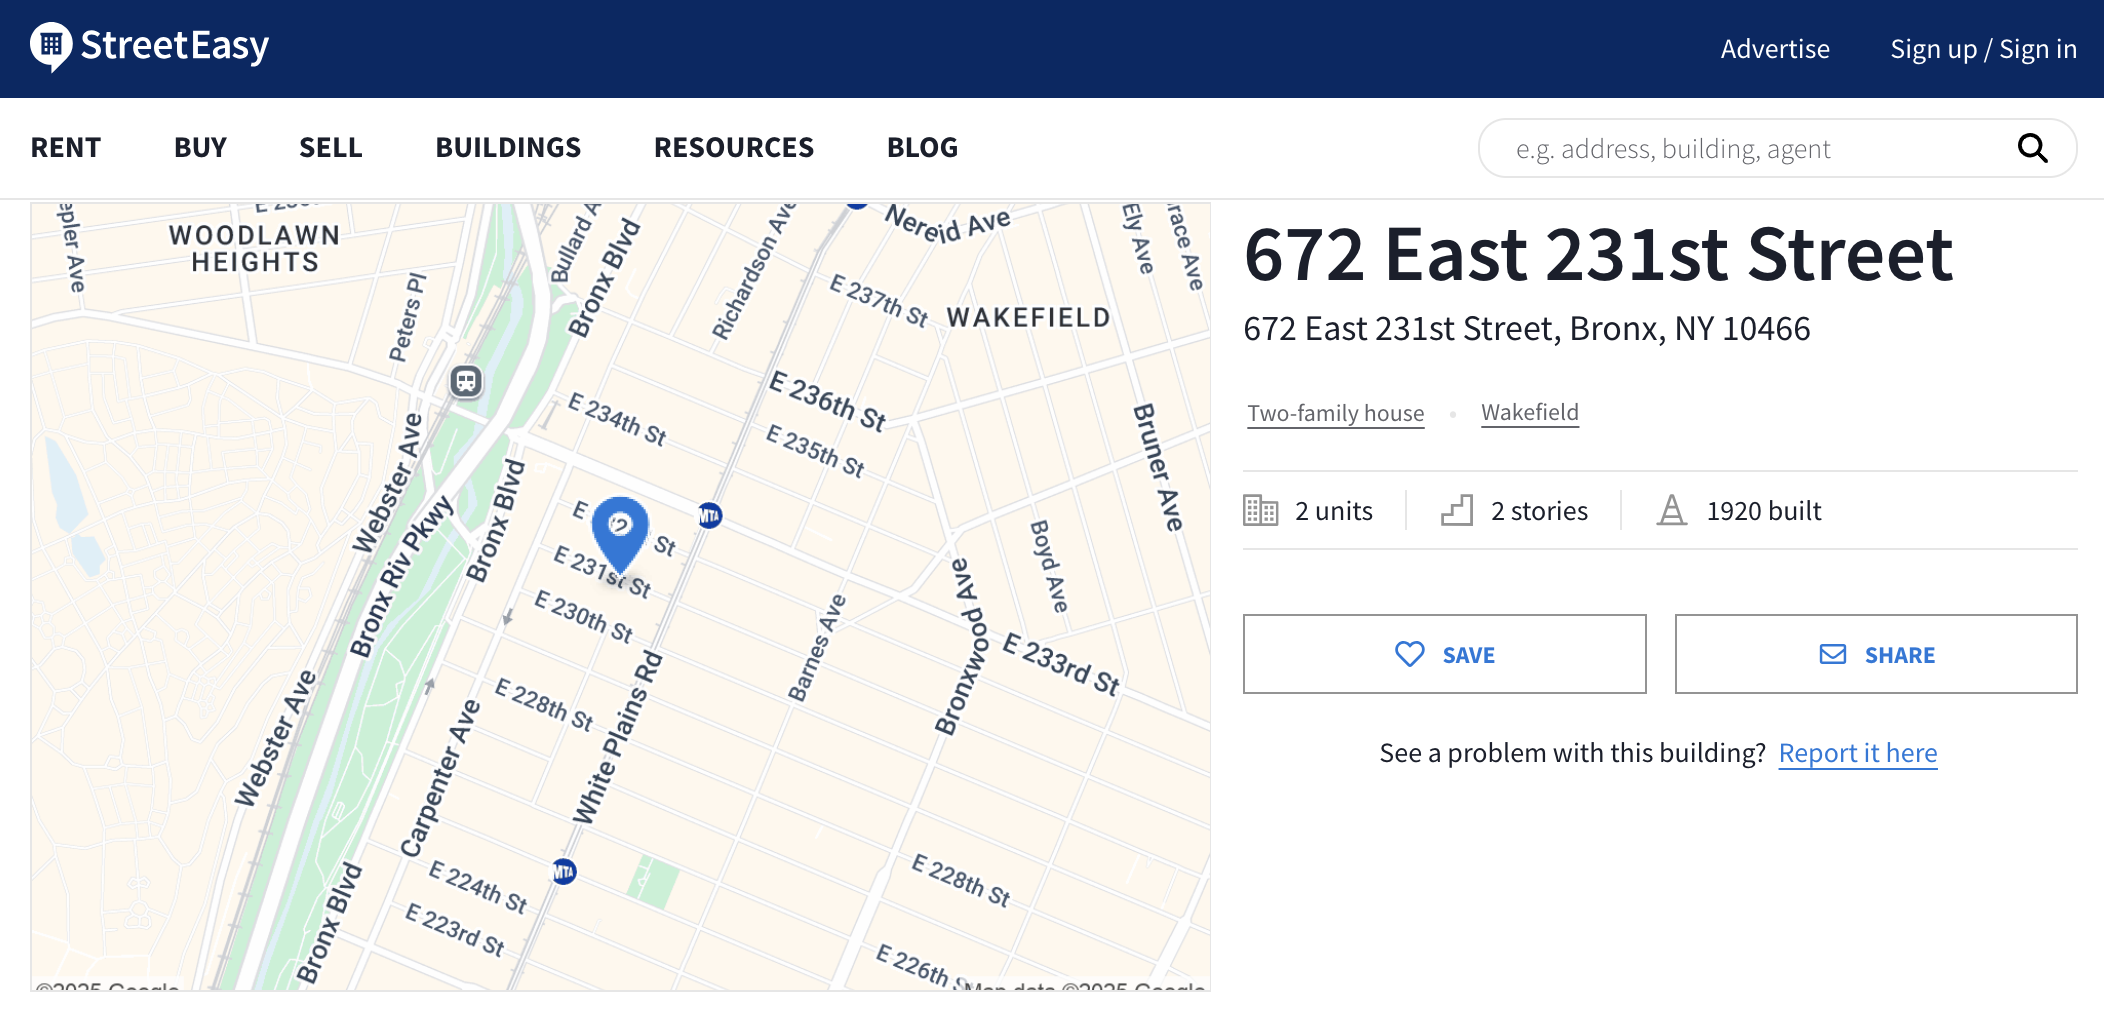

In [146]:
from IPython.display import Image
Image('672 EAST 231 STREET.png')

Some interesting news article - most noise source: **common party noise**.  \
"
In 2024, New Yorkers called in a total of 753,222 noise complaints. Incredibly, almost 10 percent of them came from residents of Bronx Community District 12, which encompasses several neighborhoods including Williamsbridge and Baychester. Of the 73,014 complaints there, 69,781 concerned residential noise.

George Torres, a manager for Bronx Community District 12, said parties and loud music are common in the area. 'The attitude of the environment up here is very permissive,” he said. “You have businesses that listen to music right on the street.' " -NYT

**Bronx Community District 12**, where this building, called Wakefield Complex was located.
Source: https://www.nytimes.com/2025/01/30/realestate/new-york-citys-noisiest-neighborhoods.html



In [147]:
list(complaint_counts_by_bbl.bbl.head(20))

[2048330080,
 2048330028,
 4068290001,
 2048330083,
 2031430130,
 2025110068,
 2039447501,
 2039437501,
 1019330050,
 3000680001,
 1020980047,
 2048340019,
 4015110001,
 2028820229,
 1022190001,
 2042850005,
 3042719001,
 1020880043,
 2029020036,
 2029010001]

In [208]:
bbl_list = [2048330028, 4068290001,2048330083,2031430130,2025110068,2039447501,2039437501,1019330050,3000680001,1020980047,2048340019,
 4015110001,2028820229,1022190001,2042850005,3042719001,1020880043,2029020036,2029010001]
building_info2 = bbl_df[bbl_df['bbl'].isin(bbl_list)]
building_info2[['bbl', 'address', 'borough', 'numfloors', 'unitsres', 'yearbuilt', 'building_size_category']]


,bbl,address,borough,numfloors,unitsres,yearbuilt,building_size_category
102403,2029010001,1309 PARK AVENUE,BX,16.0,546.0,1964.0,mega
111660,2042850005,2040 BRONXDALE AVENUE,BX,6.0,53.0,1937.0,very large
122682,4015110001,40-45 ELBERTSON STREET,QN,6.0,235.0,1950.0,mega
262832,2031430130,2176 TIEBOUT AVENUE,BX,6.0,60.0,1927.0,very large
337944,1020980047,620 WEST 152 STREET,MN,5.0,26.0,1920.0,large
418368,1022190001,101 POST AVENUE,MN,6.0,121.0,1927.0,very large
475258,2039447501,9 METROPOLITAN OVAL,BX,13.0,3857.0,1940.0,mega
476739,2028820229,16 RICHMAN PLAZA,BX,44.0,1654.0,1973.0,mega
538663,2025110068,957 WOODYCREST AVENUE,BX,5.0,52.0,1924.0,very large
547473,1019330050,2410 8 AVENUE,MN,14.0,650.0,1951.0,mega


In [70]:
# bbl_evictions['bbl'] = bbl_evictions['bbl'].astype('int64')

In [69]:
# bbl_evictions[bbl_evictions['bbl_clean'].isin(bbl_list)][["bbl", 'average_year_eviction_count']]

In [209]:
additional_stats = {
    'median': f"{complaint_counts_by_bbl['complaint_count'].median():.0f}",
    'mode': f"{complaint_counts_by_bbl['complaint_count'].mode()[0]:.0f}",
    'range': f"{complaint_counts_by_bbl['complaint_count'].max() - complaint_counts_by_bbl['complaint_count'].min():.0f}",
    'iqr': f"{complaint_counts_by_bbl['complaint_count'].quantile(0.75) - complaint_counts_by_bbl['complaint_count'].quantile(0.25):.0f}",
    'skew': f"{complaint_counts_by_bbl['complaint_count'].skew():.2f}",
    'kurtosis': f"{complaint_counts_by_bbl['complaint_count'].kurtosis():.2f}",
    'sum': f"{complaint_counts_by_bbl['complaint_count'].sum():.0f}",
    'variance': f"{complaint_counts_by_bbl['complaint_count'].var():.0f}"
}
additional_stats

{'median': '2',
 'mode': '1',
 'range': '115558',
 'iqr': '5',
 'skew': '358.88',
 'kurtosis': '148195.38',
 'sum': '3902356',
 'variance': '68097'}

In [211]:
top_complaint_buildings = complaint_counts_by_bbl.head(40)
top_complaint_buildings

,bbl,complaint_count
63790,2048330080,115559
63776,2048330028,60659
218857,4068290001,17739
63791,2048330083,16570
46073,2031430130,15513
36803,2025110068,7044
55682,2039447501,5619
55681,2039437501,5376
28313,1019330050,5198
71398,3000680001,5044


## To do correlation analysis, we will remove the top 2 buildings, as they are outliers, and mostly due to technical errors. \
buildings: 2048330080, 2048330028

In [228]:
covid_df_filtered = covid_df[~covid_df['bbl'].isin([2048330028, 2048330080])]

In [231]:
bbl_evictions.bbl.dtype, bbl_evictions.bbl_clean.dtype, covid_df_filtered.bbl.dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

In [214]:
bbl_evictions = bbl_evictions.drop(columns=['bbl'])
bbl_evictions = bbl_evictions.rename(columns={'bbl_clean': 'bbl'})

In [232]:
bbl_evictions['bbl'] = bbl_evictions['bbl'].astype('int64')
covid_df_filtered['bbl'] =covid_df_filtered['bbl'].astype('int64')

In [233]:
complaints_by_bbl = covid_df_filtered.groupby('bbl').size().reset_index(name='complaint_count')

In [235]:
complaints_by_bbl.complaint_count.describe()
# the top 2 are no longer included

,complaint_count
count,279397.000000
mean,13.336357
std,84.557123
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,17739.000000


In [236]:
bbl_evcitions_311_df = pd.merge(
    bbl_evictions,
    complaints_by_bbl,
    on='bbl',
    how='left'
)

In [237]:
bbl_evcitions_311_df.head()

,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,eviction_postcode,ejectment,eviction/legal_possession,latitude,...,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade,complaint_count
0,35484/19,494073,184 MT. EDEN PARKWAY,UNIT 1D,2020-01-02,BRONX,10457,Not an Ejectment,Possession,40.842943,...,mid-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","Pre-1929, pre-great depression",21-100 units,True,large,Q4 (largest 25%),1920-1929,21.0
1,251388/19,117473,160 EAST 117 STREET,3-B,2020-01-02,MANHATTAN,10035,Not an Ejectment,Possession,40.799094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,66822/19,25733,66-07 ALDERTON ST,unknown,2020-01-02,QUEENS,11374,Not an Ejectment,Possession,40.719316,...,low-rise,"1994–Present, vacancy decontrol","1981–2000, Post-Modernism","1991–2008, modern economic growth",3-5 units,True,small,Q4 (largest 25%),1990-1999,2.0
3,68501/18,91505,1245 STRATFORD AVE,D12,2020-01-02,BRONX,10472,Not an Ejectment,Possession,40.830623,...,mid-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","Pre-1929, pre-great depression",21-100 units,True,very large,Q4 (largest 25%),1920-1929,346.0
4,68498/19,26147,28-16 47TH STREET,1-L,2020-01-02,QUEENS,11103,Not an Ejectment,Possession,40.762390,...,low-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","Pre-1929, pre-great depression",6-20 units,True,medium,Q4 (largest 25%),1920-1929,1.0


In [238]:
nan_count = bbl_evcitions_311_df['complaint_count'].isna().sum()
nan_count, \
print(f"percentage of rows with missing complaint_count: {nan_count / len(bbl_evcitions_311_df) * 100:.2f}%")
# about 6.12 of buildings do not have any 311 complaints in those five years.
# safe to ignore them and just fillna

percentage of rows with missing complaint_count: 11.71%


(np.int64(742), None)

In [239]:
bbl_evcitions_311_df['complaint_count'] = bbl_evcitions_311_df['complaint_count'].fillna(0)
# fill the nan cells with 0

In [242]:
# correlation between eviction counts and complaint counts
eviction_complaint_corr = bbl_evcitions_311_df.groupby('bbl').agg({
    'court_index_number': 'count',
    'complaint_count': 'first'
}).corr()
print("Correlation between evictions and complaints:")
print(eviction_complaint_corr)

Correlation between evictions and complaints:
                    court_index_number  complaint_count
court_index_number            1.000000         0.433599
complaint_count               0.433599         1.000000


It shows a moderate strength: \
A correlation of 0.43 is moderate. It's not weak, but it's also not overwhelming. This indicates that while there is a clear relationship, many other factors also influence eviction rates beyond just complaint counts. This is understandable in complex social phenomenon like housing and evictions in NYC.

In [243]:
bbl_evcitions_311_df.to_csv('/content/drive/My Drive/X999/bbl_evcitions_311_df_groupby_bbl_covid.csv', index=False)

## To preserve all the complaint type details and find their correlations between the complaint types and the number of evictions, we need to do a simple merge that will result with most details.

In [244]:
covid_df_filtered.shape, bbl_evictions.shape

((3726138, 10), (6338, 39))

In [245]:
# all_years_df_filtered = covid_df[covid_df['bbl'] != 2048330028]

In [246]:
complaints_by_bbl = covid_df_filtered.groupby('bbl').size().reset_index(name='complaint_count')

In [247]:
evictions_by_bbl = bbl_evictions.groupby('bbl').size().reset_index(name='eviction_count')

In [248]:
bbl_complaints_evictions = complaints_by_bbl.merge(evictions_by_bbl, on='bbl', how='outer').fillna(0)

In [249]:
complaint_type_counts = covid_df_filtered.groupby(['bbl', 'complaint_type']).size().reset_index(name='type_count')
complaint_type_pivot = complaint_type_counts.pivot_table(
    index='bbl',
    columns='complaint_type',
    values='type_count',
    fill_value=0
)

In [250]:
final_analysis_df = bbl_complaints_evictions.set_index('bbl').join(complaint_type_pivot)

In [251]:
complaint_type_pivot.shape, complaints_by_bbl.shape, covid_df_filtered.shape, bbl_evictions.shape

((279397, 66), (279397, 2), (3726138, 10), (6338, 39))

In [252]:
correlations = {}
for column in complaint_type_pivot.columns:
    correlation = final_analysis_df['eviction_count'].corr(final_analysis_df[column])
    correlations[column] = correlation
# correlations

In [253]:
sorted_correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
for complaint_type, correlation in sorted_correlations.items():
    print(f"Complaint type: {complaint_type}, correlation with evictions: {correlation:.3f}")

Complaint type: WATER LEAK, correlation with evictions: 0.335
Complaint type: PLUMBING, correlation with evictions: 0.310
Complaint type: APPLIANCE, correlation with evictions: 0.290
Complaint type: UNSANITARY CONDITION, correlation with evictions: 0.277
Complaint type: Elevator, correlation with evictions: 0.257
Complaint type: PAINT/PLASTER, correlation with evictions: 0.251
Complaint type: DOOR/WINDOW, correlation with evictions: 0.208
Complaint type: ELECTRIC, correlation with evictions: 0.204
Complaint type: Construction Lead Dust, correlation with evictions: 0.178
Complaint type: SAFETY, correlation with evictions: 0.162
Complaint type: GENERAL, correlation with evictions: 0.155
Complaint type: FLOORING/STAIRS, correlation with evictions: 0.151
Complaint type: HEAT/HOT WATER, correlation with evictions: 0.145
Complaint type: Illegal Fireworks, correlation with evictions: 0.125
Complaint type: Asbestos, correlation with evictions: 0.114
Complaint type: Noise - Residential, correla

With outliers removed, the correlations are weaker.

### Moderate correlations (0.2-0.35)
1. **WATER LEAK (0.335)**: issues with water infrastructure
2. **PLUMBING (0.310)**: general plumbing problems
3. **APPLIANCE (0.290)**: problems with building-provided appliances
4. **UNSANITARY CONDITION (0.277)**: hygiene and cleanliness issues
5. **Elevator (0.257)**: elevator malfunctions
6. **PAINT/PLASTER (0.251)**: wall condition issues

### Weaker Correlations (0.15-0.2)
7. **DOOR/WINDOW (0.208)**: issues with doors or windows
8. **ELECTRIC (0.204)**: electrical problems
9. **Construction Lead Dust (0.178)**: environmental hazard
10. **SAFETY (0.162)**: general safety concerns
11. **GENERAL (0.155)**: miscellaneous building issues
12. **FLOORING/STAIRS (0.151)**: floor and stair conditions
13. **HEAT/HOT WATER (0.145)**: heating system problems
